In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder
from data.tree import Node

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-boolean5.pkl"
VALIDATION_DATA = "../expressions-synthetic/split/boolean5-validationset.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [7]:
def get_false():
    literal = "a"
    false = Node("Start", ("child",), "False")
    and_ = Node("And", ("left", "right"), "False", parent=false)
    false.set_children_for_property("child", [and_])
    literal_node = Node(literal, (), literal, parent=and_)
    and_.set_children_for_property("right", [literal_node])
    not_literal_node = Node("Not", ("child",), "Not({})".format(literal), parent=and_)
    literal_node_2 = Node(literal, (), literal, parent=not_literal_node)
    not_literal_node.set_children_for_property("child", [literal_node_2])
    and_.set_children_for_property("left", [not_literal_node])
    return list('(~{})&{}'.format(literal, literal)), false


print(get_false()[0])
print(str(get_false()[1]))

['(', '~', 'a', ')', '&', 'a']
-Start (False)
| \+child
|   \-And (False)
|     |+left
|     | \-Not (Not(a))
|     |   \+child
|     |     \-a (a)
|     \+right
|       \-a (a)



In [8]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-0.2246553 , -0.19322816,  0.05994378, -0.10504219,  0.1471862 ,
        0.01629282,  0.20368455,  0.09116426,  0.08456748, -0.39774778,
        0.08667061,  0.06709757, -0.0204767 , -0.05704992,  0.04588671,
       -0.17381725,  0.22321156,  0.14341535, -0.13140832,  0.08401683,
        0.04924533,  0.02779067,  0.17861836, -0.09290994,  0.06934671,
       -0.06163125, -0.05186525, -0.08602189, -0.10327365,  0.1095688 ,
       -0.09582886, -0.08749782, -0.08367081,  0.05243155, -0.05091744,
       -0.34149623,  0.14598325, -0.04670101, -0.15944539, -0.0155715 ,
       -0.0166856 , -0.00790933,  0.01391533, -0.00564425,  0.19333318,
        0.02010601,  0.10271509,  0.00305308, -0.15123005,  0.0560213 ,
        0.087947  , -0.23235664, -0.03873662,  0.12102579,  0.14128318,
       -0.01908738, -0.1034319 ,  0.06013175, -0.20675379,  0.0105563 ,
       -0.02523962,  0.02134788, -0.07722484,  0.01884147], dtype=float32)

In [9]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [10]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [11]:
pandas.set_option('max_rows', 200)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.333709,"And(Not(b), Not(c))","[(, ~, b, ), &, (, ~, c, )]"
1,1.102610,"Or(And(Not(a), c), And(Not(c), a))","[(, ~, (, ~, c, ), ), ^, a]"
2,1.317183,"Or(And(Not(a), c), And(Not(c), a))","[(, a, |, a, ), ^, c]"
3,1.415875,"Or(And(Not(a), c), And(Not(c), a))","[a, ^, c]"
4,1.805628,"Or(And(Not(a), Not(b), c), And(Not(a), Not(c),...","[(, b, ^, c, ), ^, a]"
5,1.328434,"Or(a, c)","[(, ~, c, ), >>, a]"
6,1.487237,"Or(a, c)","[c, |, (, c, ^, a, )]"
7,1.493158,"Or(a, c)","[(, c, >>, a, ), >>, a]"
8,1.457259,"Or(a, c)","[(, a, >>, c, ), >>, c]"
9,1.504294,"Or(a, c)","[(, a, ^, c, ), |, a]"


In [12]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

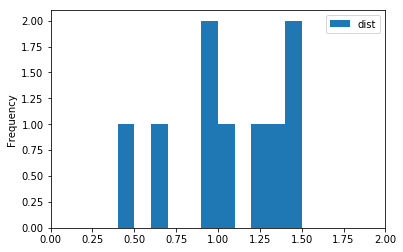

In [13]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

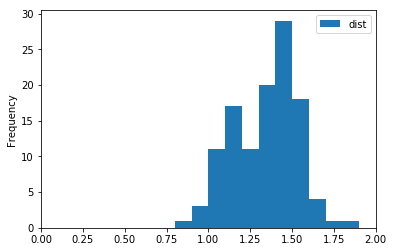

In [14]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))